# Домашнее задание по теме "Логистическая регрессия и дискриминационный анализ"

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

## Дискриминационный анализ

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data = data.iloc[:, [0, 1]]
data_class = iris.target
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [4]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)

array([1, 0, 2, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1])

In [5]:
pd.DataFrame([y_test, lda.predict(X_test)]).T

,0,1
0,2,1
1,0,0
2,2,2
3,2,2
4,1,1
5,2,2
6,1,1
7,1,1
8,1,1
9,0,0


In [6]:
accuracy_score(y_test, lda.predict(X_test))

0.9210526315789473

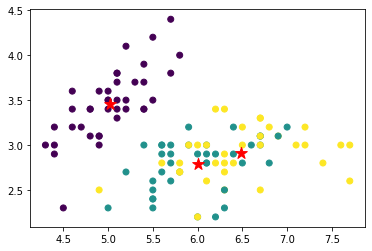

In [14]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

Не очень удачная модель. Центры двух кластеров слишком близки и кластеры наползают друг на друга.

## Кластерный анализ

In [17]:
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


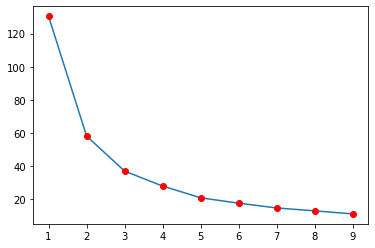

In [28]:
# строим график локтя

k_inertia = []
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

По визуализации видно, что оптимальное число кластеров - 3. Проведём кластеризацию для 3 кластеров.

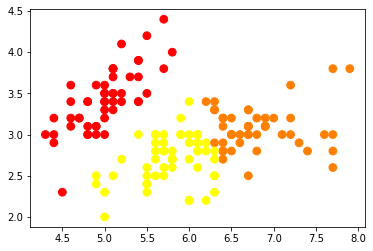

In [30]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], cmap='autumn', c=clusters, s=60)

Получаем гораздо более логичное распределение, чем в случае с LDA. На всякий случай повторим процесс для 2 и 4 кластеров.

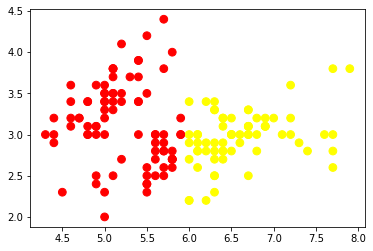

In [31]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(data)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], cmap='autumn', c=clusters, s=60)

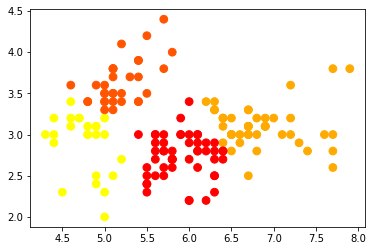

In [32]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(data)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], cmap='autumn', c=clusters, s=60)

Получаем подтверждение, что наиболее оптимальное число кластеров - 3. При большем или меньшем количестве кластеров деление классов становится менее определённым и рациональным.